<a href="https://colab.research.google.com/github/minzero-1003/capstone-project/blob/main/11_09_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A4%80%EB%B9%84_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gemma 사용을 위해 Hugging Face 트랜스포머 라이브러리 및 관련 의존성 설치
!pip install transformers accelerate bitsandbytes
# ClinicalTrials.gov API 호출 및 데이터 처리를 위한 필수 라이브러리
!pip install requests pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 16.6 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd

print("⏳ ClinicalTrials.gov API를 호출하여 데이터 10,000개를 가져옵니다...")

base_url = "https://clinicaltrials.gov/api/v2/studies"
params = {
    "sort": "LastUpdatePostDate:desc",
    "pageSize": 10000
}

try:
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    data = response.json()

    # eligibilityCriteria 텍스트만 추출
    criteria_list = []
    for study in data.get('studies', []):
        try:
            criteria = study['protocolSection']['eligibilityModule']['eligibilityCriteria']
            criteria_list.append({'eligibilityCriteria': criteria})
        except KeyError:
            continue

    print(f"✅ API로부터 {len(criteria_list)}개의 'eligibilityCriteria' 텍스트를 성공적으로 가져왔습니다.")

    # 결과 저장: trial_embeddings_10k.csv의 재료
    trials_df = pd.DataFrame(criteria_list)
    trials_df.to_csv("trials_api_10k.csv", index=False, encoding='utf-8-sig')
    print("✅ 'trials_api_10k.csv' 파일 저장 완료!")

except Exception as e:
    print(f"🔥🔥 API 호출 또는 데이터 처리 중 오류 발생: {e}")

⏳ ClinicalTrials.gov API를 호출하여 데이터 10,000개를 가져옵니다...
✅ API로부터 997개의 'eligibilityCriteria' 텍스트를 성공적으로 가져왔습니다.
✅ 'trials_api_10k.csv' 파일 저장 완료!


In [ ]:
!pip install sentence-transformers tqdm

from sentence_transformers import SentenceTransformer
import pandas as pd

# 사용할 임베딩 모델 로드 (프롬프트에서 지정된 모델)
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# --- 1. Trial 데이터 임베딩 (10,000개) ---
print("\n⏳ 'trials_api_10k.csv' 파일을 임베딩합니다...")
df_trial = pd.read_csv("trials_api_10k.csv")
texts_trial = df_trial['eligibilityCriteria'].dropna().tolist()
embeddings_trial = model.encode(texts_trial, show_progress_bar=True)

# 최종 파일 생성: trial_embeddings_10k.csv
embedding_df_trial = pd.DataFrame(embeddings_trial)
text_df_trial = pd.DataFrame(texts_trial, columns=['original_text'])
final_df_trial = pd.concat([text_df_trial, embedding_df_trial], axis=1)
final_df_trial.to_csv("trial_embeddings_10k.csv", index=False)
print("✅ 'trial_embeddings_10k.csv' 파일 생성 완료!")

# --- 2. Orphanet 데이터 임베딩 (전체) ---
print("\n⏳ 'out4.csv' 파일을 임베딩합니다...")
df_hpo = pd.read_csv("/content/out4.csv")
texts_hpo = df_hpo['HPOTERM'].dropna().tolist()
embeddings_hpo = model.encode(texts_hpo, show_progress_bar=True)

# 최종 파일 생성: orphanet_embeddings_full.csv
embedding_df_hpo = pd.DataFrame(embeddings_hpo)
text_df_hpo = pd.DataFrame(texts_hpo, columns=['original_hpoterm'])
final_df_hpo = pd.concat([text_df_hpo, embedding_df_hpo], axis=1)
final_df_hpo.to_csv("orphanet_embeddings_full.csv", index=False)
print("✅ 'orphanet_embeddings_full.csv' 파일 생성 완료!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]


⏳ 'trials_api_10k.csv' 파일을 임베딩합니다...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

✅ 'trial_embeddings_10k.csv' 파일 생성 완료!

⏳ 'out4.csv' 파일을 임베딩합니다...


Batches:   0%|          | 0/3614 [00:00<?, ?it/s]

✅ 'orphanet_embeddings_full.csv' 파일 생성 완료!


In [ ]:
import pandas as pd
import random
import re
from tqdm import tqdm

print("⏳ 1단계: 원본 CSV 파일들을 불러옵니다...")
trials_df = pd.read_csv("/content/trials_api_10k.csv")
hpo_df = pd.read_csv("/content/out4.csv")
print("✅ 파일 로드 완료!")

trials_criteria = trials_df['eligibilityCriteria'].dropna().tolist()
hpo_terms = hpo_df['HPOTERM'].dropna().tolist()

training_data = []
seen_pairs = set()

# --- 긍정 예시 (Label = 1) 생성 ---
print("  - 긍정 데이터 생성 중 (포함 관계 확인)...")
# 정규 표현식을 사용해 criteria에 hpo_term이 포함되는 긍정 쌍 빠르게 찾기
term_pattern = '|'.join(re.escape(term) for term in hpo_terms if len(term) >= 3)
regex = re.compile(term_pattern, re.IGNORECASE)

for criteria in tqdm(trials_criteria, desc="긍정 데이터 검색 중"):
    found_terms = regex.findall(criteria)
    for term in found_terms:
        pair = (criteria, term)
        if pair not in seen_pairs:
            training_data.append({'text_A': criteria, 'text_B': term, 'label': 1})
            seen_pairs.add(pair)

num_positive_samples = len([d for d in training_data if d['label']==1])
print(f"  - ✅ 긍정 데이터 {num_positive_samples}개 생성 완료!")

# --- 부정 예시 (Label = 0) 생성 (1:1 비율) ---
print(f"  - 부정 데이터 생성 중 (목표: {num_positive_samples}개)")
NUM_NEGATIVE_SAMPLES = num_positive_samples # 1:1 비율 설정

negative_count = 0
with tqdm(total=NUM_NEGATIVE_SAMPLES, desc="부정 데이터 생성 중") as pbar:
    while negative_count < NUM_NEGATIVE_SAMPLES:
        random_criteria = random.choice(trials_criteria)
        random_term = random.choice(hpo_terms)

        # 부정 예시 조건: 3글자 이상이고, 포함되지 않아야 함
        if len(random_term) >= 3 and random_term.lower() in random_criteria.lower():
            continue

        pair = (random_criteria, random_term)
        if pair not in seen_pairs:
            training_data.append({'text_A': random_criteria, 'text_B': random_term, 'label': 0})
            seen_pairs.add(pair)
            negative_count += 1
            pbar.update(1)
print(f"  - ✅ 부정 데이터 {negative_count}개 생성 완료!")

# --- 최종 CSV 파일로 저장 ---
print("\n⏳ 3단계: 'training_data_10k.csv' 파일로 저장합니다...")
final_df = pd.DataFrame(training_data)
final_df = final_df.sample(frac=1).reset_index(drop=True) # 데이터 섞기
final_df.to_csv("training_data_10k.csv", index=False, encoding='utf-8-sig')

print("\n🎉🎉🎉 성공! 'training_data_10k.csv' 파일이 생성되었습니다! 🎉🎉🎉")
print(f"총 {len(final_df)}개의 균형 잡힌 학습 데이터가 만들어졌습니다.")

⏳ 1단계: 원본 CSV 파일들을 불러옵니다...
✅ 파일 로드 완료!
  - 긍정 데이터 생성 중 (포함 관계 확인)...


긍정 데이터 검색 중: 100%|██████████| 997/997 [3:47:48<00:00, 13.71s/it]


  - ✅ 긍정 데이터 5539개 생성 완료!
  - 부정 데이터 생성 중 (목표: 5539개)


부정 데이터 생성 중: 100%|██████████| 5539/5539 [00:00<00:00, 28063.87it/s]


  - ✅ 부정 데이터 5539개 생성 완료!

⏳ 3단계: 'training_data_10k.csv' 파일로 저장합니다...

🎉🎉🎉 성공! 'training_data_10k.csv' 파일이 생성되었습니다! 🎉🎉🎉
총 11078개의 균형 잡힌 학습 데이터가 만들어졌습니다.


그전에 Google Drive 마운트 및 저장 경로 설정부터 하고 갈것임.

In [2]:
from google.colab import drive
import os
import torch # torch.save를 사용하기 위해 미리 import

# Google Drive 마운트
drive.mount('/content/drive')

# 모델 가중치를 저장할 경로 설정
# Colab Notebooks 폴더 아래에 'MLP_Checkpoints' 폴더를 생성하도록 지정합니다.
MODEL_SAVE_PATH = '/content/drive/MyDrive/Colab Notebooks/MLP_Checkpoints'
os.makedirs(MODEL_SAVE_PATH, exist_ok=True) # 폴더가 없으면 생성

print(f"✅ 모델 저장 경로: {MODEL_SAVE_PATH}")

Mounted at /content/drive
✅ 모델 저장 경로: /content/drive/MyDrive/Colab Notebooks/MLP_Checkpoints


MLP 실행해볼것임.

✅ Device: cpu
✅ 모든 새로운 CSV 파일 로드 완료!
Trial Embeddings (New) shape: (997, 513)
HPO Embeddings (New) shape: (115627, 513)
Training Data shape: (11078, 3)
✅ 새로운 임베딩 차원: 512

⏳ training_data.csv를 기반으로 벡터 쌍을 생성합니다...


데이터 쌍 생성 중: 100%|██████████| 11078/11078 [00:00<00:00, 12813.53it/s]


⚠️ 경고: 5016개의 텍스트 쌍에 대한 벡터를 찾지 못했습니다.
✅ 입력 shape: (6062, 2, 512) | 라벨 수: 6062
✅ 학습 데이터: 4849개, 테스트 데이터: 1213개

✅ MLP 모델 정의 완료!

⏳ 모델 학습을 시작합니다 (Google Drive에 체크포인트 저장)...


Epoch 1/20 [학습]: 100%|██████████| 152/152 [00:01<00:00, 126.59it/s]


Epoch [1/20] | Loss: 0.4743 | Val F1: 0.0000 (Best F1: 0.0000)


Epoch 2/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 189.20it/s]


Epoch [2/20] | Loss: 0.2846 | Val F1: 0.0000 (Best F1: 0.0000)


Epoch 3/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 219.30it/s]


Epoch [3/20] | Loss: 0.2580 | Val F1: 0.0000 (Best F1: 0.0000)


Epoch 4/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 235.12it/s]


Epoch [4/20] | Loss: 0.2311 | Val F1: 0.0000 (Best F1: 0.0000)


Epoch 5/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 215.83it/s]


  ✨ **CheckPoint 저장됨**: Epoch 5, F1: 0.3182 (Google Drive)
Epoch [5/20] | Loss: 0.2084 | Val F1: 0.3182 (Best F1: 0.3182)


Epoch 6/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 213.98it/s]


  ✨ **CheckPoint 저장됨**: Epoch 6, F1: 0.3662 (Google Drive)
Epoch [6/20] | Loss: 0.1940 | Val F1: 0.3662 (Best F1: 0.3662)


Epoch 7/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 210.37it/s]


  ✨ **CheckPoint 저장됨**: Epoch 7, F1: 0.4000 (Google Drive)
Epoch [7/20] | Loss: 0.1841 | Val F1: 0.4000 (Best F1: 0.4000)


Epoch 8/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 206.82it/s]


Epoch [8/20] | Loss: 0.1772 | Val F1: 0.4000 (Best F1: 0.4000)


Epoch 9/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 208.20it/s]


  ✨ **CheckPoint 저장됨**: Epoch 9, F1: 0.4324 (Google Drive)
Epoch [9/20] | Loss: 0.1727 | Val F1: 0.4324 (Best F1: 0.4324)


Epoch 10/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 211.55it/s]


  ✨ **CheckPoint 저장됨**: Epoch 10, F1: 0.4645 (Google Drive)
Epoch [10/20] | Loss: 0.1669 | Val F1: 0.4645 (Best F1: 0.4645)


Epoch 11/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 158.99it/s]


  ✨ **CheckPoint 저장됨**: Epoch 11, F1: 0.5325 (Google Drive)
Epoch [11/20] | Loss: 0.1621 | Val F1: 0.5325 (Best F1: 0.5325)


Epoch 12/20 [학습]: 100%|██████████| 152/152 [00:01<00:00, 150.27it/s]


  ✨ **CheckPoint 저장됨**: Epoch 12, F1: 0.5385 (Google Drive)
Epoch [12/20] | Loss: 0.1576 | Val F1: 0.5385 (Best F1: 0.5385)


Epoch 13/20 [학습]: 100%|██████████| 152/152 [00:01<00:00, 150.58it/s]


Epoch [13/20] | Loss: 0.1542 | Val F1: 0.5380 (Best F1: 0.5385)


Epoch 14/20 [학습]: 100%|██████████| 152/152 [00:01<00:00, 139.19it/s]


  ✨ **CheckPoint 저장됨**: Epoch 14, F1: 0.5683 (Google Drive)
Epoch [14/20] | Loss: 0.1513 | Val F1: 0.5683 (Best F1: 0.5683)


Epoch 15/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 167.72it/s]


Epoch [15/20] | Loss: 0.1472 | Val F1: 0.5517 (Best F1: 0.5683)


Epoch 16/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 200.52it/s]


Epoch [16/20] | Loss: 0.1447 | Val F1: 0.5537 (Best F1: 0.5683)


Epoch 17/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 217.07it/s]


Epoch [17/20] | Loss: 0.1403 | Val F1: 0.5618 (Best F1: 0.5683)


Epoch 18/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 208.03it/s]


  ✨ **CheckPoint 저장됨**: Epoch 18, F1: 0.6000 (Google Drive)
Epoch [18/20] | Loss: 0.1380 | Val F1: 0.6000 (Best F1: 0.6000)


Epoch 19/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 209.68it/s]


  ✨ **CheckPoint 저장됨**: Epoch 19, F1: 0.6186 (Google Drive)
Epoch [19/20] | Loss: 0.1344 | Val F1: 0.6186 (Best F1: 0.6186)


Epoch 20/20 [학습]: 100%|██████████| 152/152 [00:00<00:00, 211.23it/s]


Epoch [20/20] | Loss: 0.1326 | Val F1: 0.5629 (Best F1: 0.6186)

=== 최종 Classification Report (Single MLP Encoder) ===
              precision    recall  f1-score   support

         0.0     0.9496    0.9865    0.9677      1108
         1.0     0.7581    0.4476    0.5629       105

    accuracy                         0.9398      1213
   macro avg     0.8538    0.7170    0.7653      1213
weighted avg     0.9330    0.9398    0.9326      1213



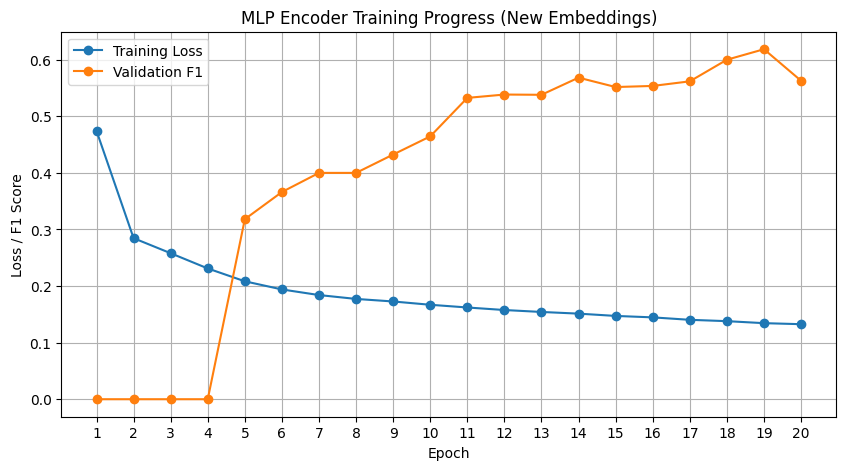

In [5]:
# ======================================#
# 🔧 라이브러리 (필수)
# ======================================
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

# GPU 사용 가능하면 사용, 아니면 CPU 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Device:", device)

# ======================================#
# 1️⃣ CSV 불러오기 (경로 확인 완료)
# ======================================
try:
    # Step 3에서 만든 파일 이름 사용
    trial_embed_df = pd.read_csv("/content/trial_embeddings_10k.csv")
    hpo_embed_df = pd.read_csv("/content/orphanet_embeddings_full.csv")
    training_df = pd.read_csv("/content/training_data_10k.csv")
    print("✅ 모든 새로운 CSV 파일 로드 완료!")
except FileNotFoundError:
    print("🔥🔥 오류: 필요한 새로운 CSV 파일 3개가 모두 업로드되었거나 경로가 올바른지 확인하세요.")
    trial_embed_df = None
    hpo_embed_df = None
    training_df = None


if trial_embed_df is not None and hpo_embed_df is not None and training_df is not None:
    print("Trial Embeddings (New) shape:", trial_embed_df.shape)
    print("HPO Embeddings (New) shape:", hpo_embed_df.shape)
    print("Training Data shape:", training_df.shape)

    trial_vecs = trial_embed_df.iloc[:, 1:].values.astype(np.float32)
    hpo_vecs = hpo_embed_df.iloc[:, 1:].values.astype(np.float32)

    trial_text_to_idx = {str(text): idx for idx, text in enumerate(trial_embed_df.iloc[:, 0])}
    hpo_text_to_idx = {str(text): idx for idx, text in enumerate(hpo_embed_df.iloc[:, 0])}

    embedding_dim = trial_vecs.shape[1]
    print(f"✅ 새로운 임베딩 차원: {embedding_dim}")

    # ======================================#
    # 2️⃣ 입력 시퀀스 생성
    # ======================================
    pairs = []
    labels = []
    not_found_count = 0

    print("\n⏳ training_data.csv를 기반으로 벡터 쌍을 생성합니다...")
    for index, row in tqdm(training_df.iterrows(), total=len(training_df), desc="데이터 쌍 생성 중"):
        text_a = str(row['text_A'])
        text_b = str(row['text_B'])
        label = row['label']

        idx_a = trial_text_to_idx.get(text_a)
        idx_b = hpo_text_to_idx.get(text_b)

        if idx_a is not None and idx_b is not None:
            pair_vec = np.stack([trial_vecs[idx_a], hpo_vecs[idx_b]], axis=0)
            pairs.append(pair_vec)
            labels.append(label)
        else:
            not_found_count += 1

    if not_found_count > 0:
        print(f"⚠️ 경고: {not_found_count}개의 텍스트 쌍에 대한 벡터를 찾지 못했습니다.")

    pairs = np.array(pairs)
    labels = np.array(labels)

    if len(pairs) > 0:
        print(f"✅ 입력 shape: {pairs.shape} | 라벨 수: {len(labels)}")
    else:
        print("🔥🔥 오류: 유효한 벡터 쌍을 하나도 생성하지 못했습니다. CSV 파일들을 확인하세요.")
        pairs = np.array([])
        labels = np.array([])

    if len(pairs) > 0:
        # ======================================#
        # 3️⃣ Dataset 정의
        # ======================================
        class EmbeddingDataset(Dataset):
            def __init__(self, X, y):
                self.X = torch.tensor(X, dtype=torch.float32)
                self.y = torch.tensor(y, dtype=torch.float32)
            def __len__(self): return len(self.X)
            def __getitem__(self, idx): return self.X[idx], self.y[idx]

        if len(np.unique(labels)) < 2 or np.min(np.bincount(labels)) < 2:
              print("🔥🔥 오류: 학습/테스트 데이터 분리 후 각 클래스에 샘플이 부족합니다. 데이터셋 크기를 확인하세요.")
              X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
        else:
            X_train, X_test, y_train, y_test = train_test_split(pairs, labels, test_size=0.2, random_state=42, stratify=labels)

        if len(X_train) > 0 and len(X_test) > 0:
            train_ds = EmbeddingDataset(X_train, y_train)
            test_ds = EmbeddingDataset(X_test, y_test)

            train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
            test_loader = DataLoader(test_ds, batch_size=32)
            print(f"✅ 학습 데이터: {len(X_train)}개, 테스트 데이터: {len(X_test)}개")

            # ======================================#
            # 4️⃣ MLP 인코더 정의
            # ======================================
            class MLPVectorClassifier(nn.Module):
                def __init__(self, input_dim, hidden_dim_1=256, hidden_dim_2=64):
                    super(MLPVectorClassifier, self).__init__()
                    flattened_dim = input_dim * 2

                    self.fc1 = nn.Linear(flattened_dim, hidden_dim_1)
                    self.dropout1 = nn.Dropout(0.3)
                    self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
                    self.dropout2 = nn.Dropout(0.3)
                    self.fc3 = nn.Linear(hidden_dim_2, 1)

                def forward(self, x):
                    x = x.view(x.size(0), -1)
                    x = torch.relu(self.fc1(x))
                    x = self.dropout1(x)
                    x = torch.relu(self.fc2(x))
                    x = self.dropout2(x)
                    out = self.fc3(x)
                    return torch.sigmoid(out).squeeze(-1) if out.ndim > 1 else torch.sigmoid(out).squeeze()

            # 모델, 손실 함수, 옵티마이저 정의
            model = MLPVectorClassifier(input_dim=embedding_dim).to(device)
            criterion = nn.BCELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
            print("\n✅ MLP 모델 정의 완료!")

            best_f1 = 0.0 # F1-Score 초기화

            # ======================================#
            # 5️⃣ 학습 루프 (체크포인트 저장 로직 포함)
            # ======================================
            EPOCHS = 20 # 학습 반복 횟수
            train_loss_list, val_f1_list = [], []

            print("\n⏳ 모델 학습을 시작합니다 (Google Drive에 체크포인트 저장)...")
            for epoch in range(EPOCHS):
                model.train()
                total_loss = 0
                for Xb, yb in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [학습]"):
                    Xb, yb = Xb.to(device), yb.to(device)

                    optimizer.zero_grad()
                    outputs = model(Xb)
                    loss = criterion(outputs, yb)
                    loss.backward()
                    optimizer.step()
                    total_loss += loss.item()

                avg_loss = total_loss / len(train_loader)
                train_loss_list.append(avg_loss)

                # --- 검증 단계 ---
                model.eval()
                all_preds, all_labels = [], []
                with torch.no_grad():
                    for Xb, yb in test_loader:
                        Xb = Xb.to(device)
                        probs = model(Xb).cpu().numpy()
                        preds = (probs > 0.5).astype(int)

                        if preds.ndim == 0:
                            all_preds.append(int(preds))
                        else:
                            all_preds.extend(preds.tolist())

                        all_labels.extend(yb.numpy().tolist())

                f1 = f1_score(all_labels, all_preds, zero_division=0)
                val_f1_list.append(f1)

                # --- ✨ 체크포인트 저장 로직 ✨ ---
                if f1 > best_f1:
                    best_f1 = f1
                    model_path = os.path.join(MODEL_SAVE_PATH, f"MLP_best_epoch_{epoch+1}_f1_{f1:.4f}.pth")
                    torch.save(model.state_dict(), model_path)
                    print(f"  ✨ **CheckPoint 저장됨**: Epoch {epoch+1}, F1: {f1:.4f} (Google Drive)")

                print(f"Epoch [{epoch+1}/{EPOCHS}] | Loss: {avg_loss:.4f} | Val F1: {f1:.4f} (Best F1: {best_f1:.4f})")

            # ======================================#
            # 6️⃣ 최종 평가 및 시각화
            # ======================================
            print("\n=== 최종 Classification Report (Single MLP Encoder) ===")
            print(classification_report(all_labels, all_preds, digits=4, zero_division=0))

            plt.figure(figsize=(10, 5))
            plt.plot(range(1, EPOCHS + 1), train_loss_list, label="Training Loss", marker='o')
            plt.plot(range(1, EPOCHS + 1), val_f1_list, label="Validation F1", marker='o')
            plt.title("MLP Encoder Training Progress (New Embeddings)")
            plt.xlabel("Epoch")
            plt.ylabel("Loss / F1 Score")
            plt.xticks(range(1, EPOCHS + 1))
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("🔥🔥 오류: 학습 또는 테스트 데이터셋 크기가 0입니다. 데이터 분리 설정을 확인하세요.")
    else:
        print("🔥🔥 오류: 유효한 데이터 쌍이 없어 모델 학습을 진행할 수 없습니다.")
else:
    print("🔥🔥 오류: 필요한 데이터프레임이 로드되지 않아 처리를 계속할 수 없습니다.")